# Model Traning

In [38]:
import pandas as pd
import numpy as np

In [39]:
df = pd.read_csv("Energy Consumption.csv")

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16599 entries, 0 to 16598
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   States     16599 non-null  object 
 1   Regions    16599 non-null  object 
 2   latitude   16599 non-null  float64
 3   longitude  16599 non-null  float64
 4   Dates      16599 non-null  object 
 5   Usage      16599 non-null  float64
dtypes: float64(3), object(3)
memory usage: 778.2+ KB


In [41]:
df.head()

,States,Regions,latitude,longitude,Dates,Usage
0,Punjab,NR,31.519974,75.980003,02/01/2019 00:00:00,119.9
1,Haryana,NR,28.450006,77.019991,02/01/2019 00:00:00,130.3
2,Rajasthan,NR,26.449999,74.639981,02/01/2019 00:00:00,234.1
3,Delhi,NR,28.669993,77.230004,02/01/2019 00:00:00,85.8
4,UP,NR,27.599981,78.050006,02/01/2019 00:00:00,313.9


In [42]:
df = df.drop(columns = ["Regions"])

In [43]:
df.head()

,States,latitude,longitude,Dates,Usage
0,Punjab,31.519974,75.980003,02/01/2019 00:00:00,119.9
1,Haryana,28.450006,77.019991,02/01/2019 00:00:00,130.3
2,Rajasthan,26.449999,74.639981,02/01/2019 00:00:00,234.1
3,Delhi,28.669993,77.230004,02/01/2019 00:00:00,85.8
4,UP,27.599981,78.050006,02/01/2019 00:00:00,313.9


In [44]:
df.isnull().sum()

States       0
latitude     0
longitude    0
Dates        0
Usage        0
dtype: int64

In [45]:
df['Dates'] = pd.to_datetime(df['Dates'], format='%d/%m/%Y %H:%M:%S')

In [46]:
df.head()

,States,latitude,longitude,Dates,Usage
0,Punjab,31.519974,75.980003,2019-01-02,119.9
1,Haryana,28.450006,77.019991,2019-01-02,130.3
2,Rajasthan,26.449999,74.639981,2019-01-02,234.1
3,Delhi,28.669993,77.230004,2019-01-02,85.8
4,UP,27.599981,78.050006,2019-01-02,313.9


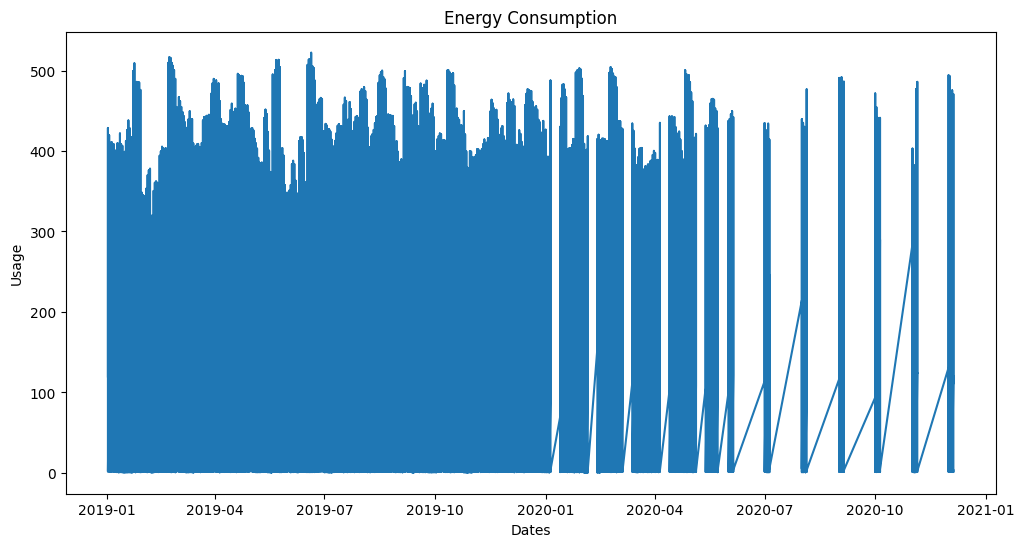

In [47]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(df['Dates'], df['Usage'])
plt.title("Energy Consumption")
plt.xlabel("Dates")
plt.ylabel("Usage")
plt.show()

In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [12]:
df['States'] = le.fit_transform(df['States'])

In [13]:
df.head()

,States,latitude,longitude,Dates,Usage
0,24,31.519974,75.980003,2019-01-02,119.9
1,11,28.450006,77.019991,2019-01-02,130.3
2,25,26.449999,74.639981,2019-01-02,234.1
3,7,28.669993,77.230004,2019-01-02,85.8
4,30,27.599981,78.050006,2019-01-02,313.9


In [14]:
df['hour'] = df['Dates'].dt.hour
df['day'] = df['Dates'].dt.day
df['month'] = df['Dates'].dt.month
df['weekday'] = df['Dates'].dt.weekday

In [15]:
X = df[['latitude', 'longitude', 'hour', 'day', 'month', 'weekday', 'States']]
y = df['Usage']

In [16]:
df.head()

,States,latitude,longitude,Dates,Usage,hour,day,month,weekday
0,24,31.519974,75.980003,2019-01-02,119.9,0,2,1,2
1,11,28.450006,77.019991,2019-01-02,130.3,0,2,1,2
2,25,26.449999,74.639981,2019-01-02,234.1,0,2,1,2
3,7,28.669993,77.230004,2019-01-02,85.8,0,2,1,2
4,30,27.599981,78.050006,2019-01-02,313.9,0,2,1,2


In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
model = LinearRegression()

In [20]:
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [21]:
y_pred = model.predict(X_test)

In [22]:
for i in range(5):
    print("Actual Usage: ", y_test.iloc[i],"Predicted Usage: ", y_pred[i])

Actual Usage:  67.0 Predicted Usage:  182.3578567191879
Actual Usage:  217.3 Predicted Usage:  160.4411826048331
Actual Usage:  222.7 Predicted Usage:  182.47872733967085
Actual Usage:  175.5 Predicted Usage:  166.03598311283497
Actual Usage:  1.9 Predicted Usage:  22.14400392169489


In [23]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred) # Takes Difference between actual value (y_test)  and pridicted values (y_pred)
print("Mean Squared Error: ", mse)

r2 = r2_score(y_test, y_pred)  # Calculated Coefficient of Determination
print("R2 Score: ", r2)

Mean Squared Error:  8651.168029504239
R2 Score:  0.3665561009585423


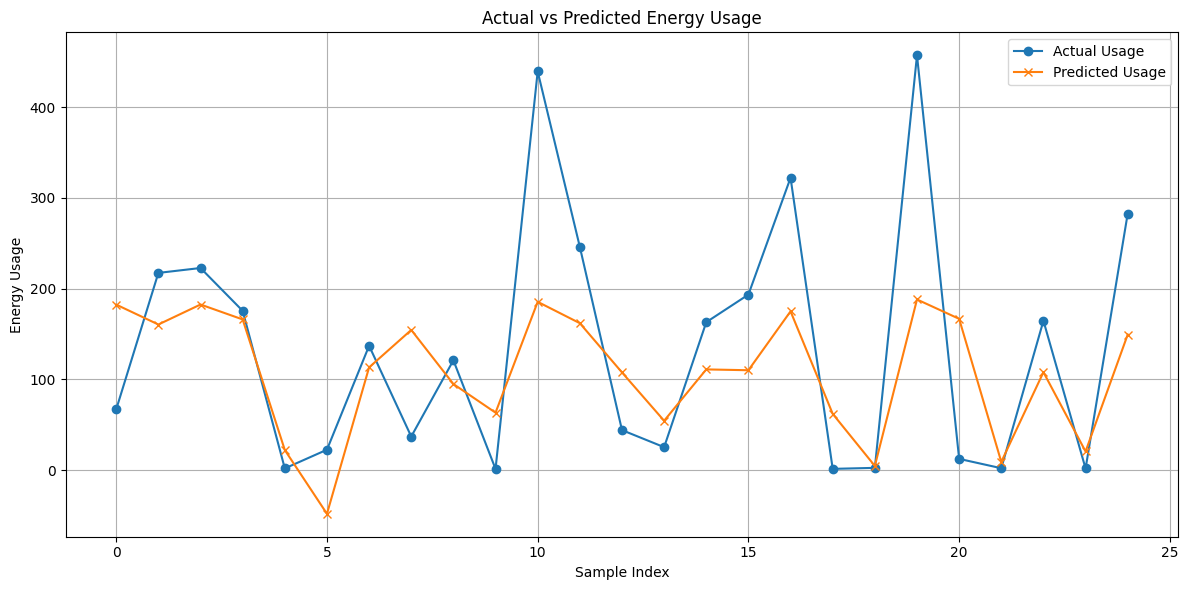

In [24]:
import matplotlib.pyplot as plt

n = 25
plt.figure(figsize=(12, 6))
plt.plot(range(n), y_test.iloc[:n], label='Actual Usage', marker='o')
plt.plot(range(n), y_pred[:n], label='Predicted Usage', marker='x')

plt.title('Actual vs Predicted Energy Usage')
plt.xlabel('Sample Index')
plt.ylabel('Energy Usage')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [25]:
df.head()

,States,latitude,longitude,Dates,Usage,hour,day,month,weekday
0,24,31.519974,75.980003,2019-01-02,119.9,0,2,1,2
1,11,28.450006,77.019991,2019-01-02,130.3,0,2,1,2
2,25,26.449999,74.639981,2019-01-02,234.1,0,2,1,2
3,7,28.669993,77.230004,2019-01-02,85.8,0,2,1,2
4,30,27.599981,78.050006,2019-01-02,313.9,0,2,1,2


MAE: 11.493063701233506
RMSE: 22.453401046370942
R2: 0.9630854416108033


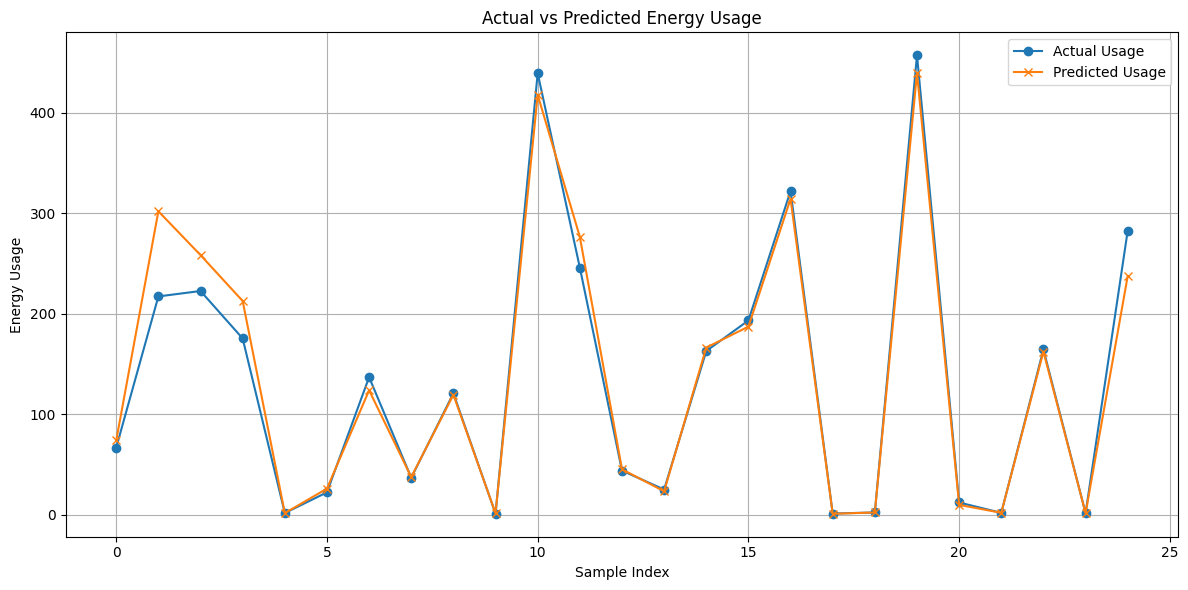

In [26]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# Assume df is already loaded with 'Dates', 'States', 'latitude', 'longitude', 'Usage'

# Convert 'Dates' to datetime (if not done earlier)
df['Dates'] = pd.to_datetime(df['Dates'], format='%d/%m/%Y %H:%M:%S')

# Step 1: Define the model first`

model = RandomForestRegressor(random_state=42)

# Step 2: Do preprocessing and feature engineering just before training
le = LabelEncoder()
df['States'] = le.fit_transform(df['States'])

df['hour'] = df['Dates'].dt.hour
df['day'] = df['Dates'].dt.day
df['month'] = df['Dates'].dt.month
df['weekday'] = df['Dates'].dt.weekday

X = df[['latitude', 'longitude', 'hour', 'day', 'month', 'weekday', 'States']]
y = df['Usage']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train the model
model.fit(X_train, y_train)

# Step 4: Predict and evaluate
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print('MAE:', mae)
print('RMSE:', rmse)
print('R2:', r2)

# Plot actual vs predicted energy usage for first 25 samples
n = 25
plt.figure(figsize=(12,6))
plt.plot(range(n), y_test.iloc[:n], label='Actual Usage', marker='o')
plt.plot(range(n), y_pred[:n], label='Predicted Usage', marker='x')
plt.title('Actual vs Predicted Energy Usage')
plt.xlabel('Sample Index')
plt.ylabel('Energy Usage')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
